## What are Loss Functions?

The loss function is the function that computes the distance between the current output of the algorithm and the expected output. It’s a method to evaluate how your algorithm models the data. It can be categorized into two groups. One for classification (discrete values, 0,1,2…) and the other for regression (continuous values).

## What are Cost Functions?

Loss function: Used when we refer to the error for a single training example. <br>
Cost function: Used to refer to an average of the loss functions over an entire training dataset.

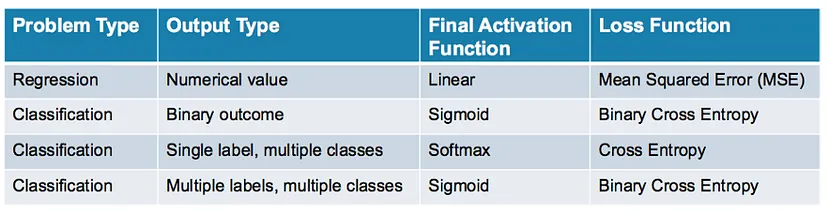

## 1) Mean Absoulte Error

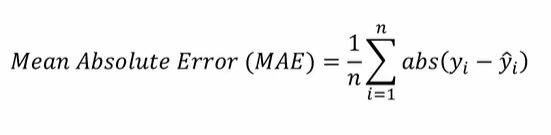

In [1]:
import numpy as np

In [2]:
y_predicted = np.array([1,1,0,0,1])
y_actual = np.array([0.7,1,0,0.3,1.2])

In [5]:
def mae(y_predicted,y_actual):
    total_error = 0
    for predicted,actual in zip(y_predicted,y_actual):
        error = abs(actual-predicted)
        total_error += error
    print('Total Error : ',total_error)
    print('MAE : ',total_error/len(y_predicted))
    return total_error/len(y_predicted)

In [6]:
mae(y_predicted,y_actual)

Total Error :  0.8
MAE :  0.16


0.16

## 2) Mean Squared Error (MSE)

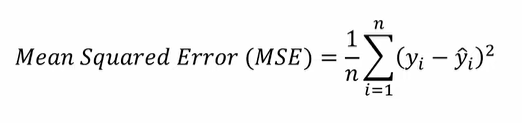

In [10]:
def mse(y_predicted,y_actual):
    total_error = 0
    for predicted,actual in zip(y_predicted,y_actual):
        error = (actual - predicted)**2
        total_error += error
    print('Total Error : ',total_error)
    print('MSE : ',total_error/len(y_predicted))
    return total_error/len(y_predicted)

In [11]:
mse(y_predicted,y_actual)

Total Error :  0.22
MSE :  0.044


## 3) Log Loss or Binary Cross Entropy

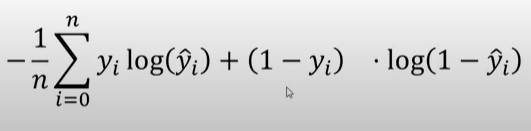

In [14]:
np.log(1)

0.0

In [15]:
np.log(0)

C:\Users\DARIN\AppData\Local\Temp\ipykernel_15756\2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

Since log(0) is infinte, we need to replace the '0' with small change Epsilon and '1' with 1-Epsilon in y_predicted array.

In [16]:
epsilon = 1e-15

In [17]:
def binary_cross_entropy(y_predicted,y_actual):
    total_error = 0
    for predicted,actual in zip(y_predicted,y_actual):
        predicted = max(predicted,epsilon)
        predicted = min(predicted,1-epsilon)
        error = (actual*np.log(predicted))+((1-actual)*np.log(1-predicted))
        total_error += error
    print("Total Error : ",total_error)
    print("Log Loss : ",-total_error/len(y_actual))

In [18]:
y_predicted

array([1, 1, 0, 0, 1])

In [20]:
Y_actual = np.array([0.3,0.7,1,0,0.5])
Y_actual

array([0.3, 0.7, 1. , 0. , 0.5])

In [21]:
binary_cross_entropy(y_predicted,Y_actual)

Total Error :  -86.34814038342199
Log Loss :  17.2696280766844


## 4) Softmax

https://towardsdatascience.com/softmax-activation-function-how-it-actually-works-d292d335bd78

Softmax is an activation function that scales numbers/logits into probabilities. The output of a Softmax is a vector (say v) with probabilities of each possible outcome. The probabilities in vector v sums to one for all possible outcomes or classes.<br>

Mathematically, Softmax is defined as,

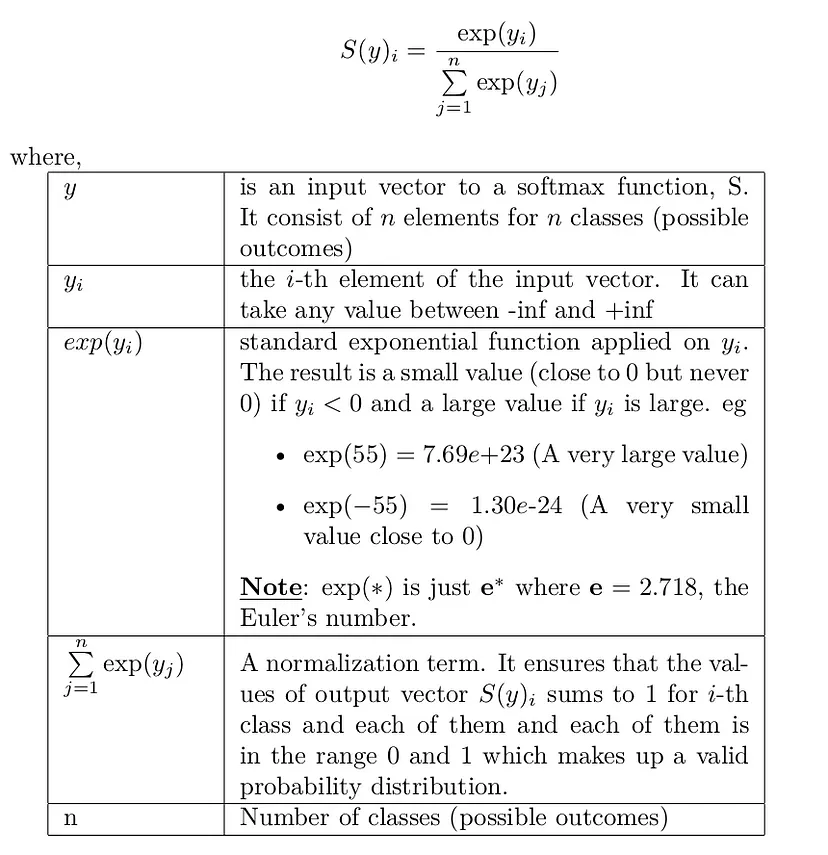

#### Example 
Consider a CNN model which aims at classifying an image as either a dog, cat, horse or cheetah (4 possible outcomes/classes). <br>The last (fully-connected) layer of the CNN outputs a vector of logits, L, that is passed through a Softmax layer that transforms the logits into probabilities, P. These probabilities are the model predictions for each of the 4 classes.

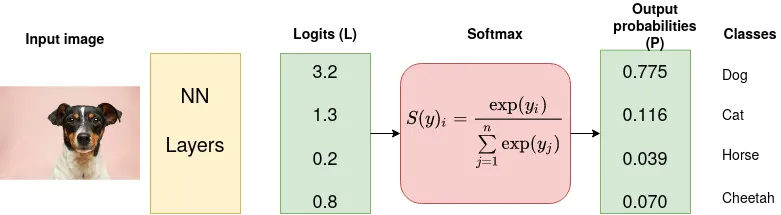

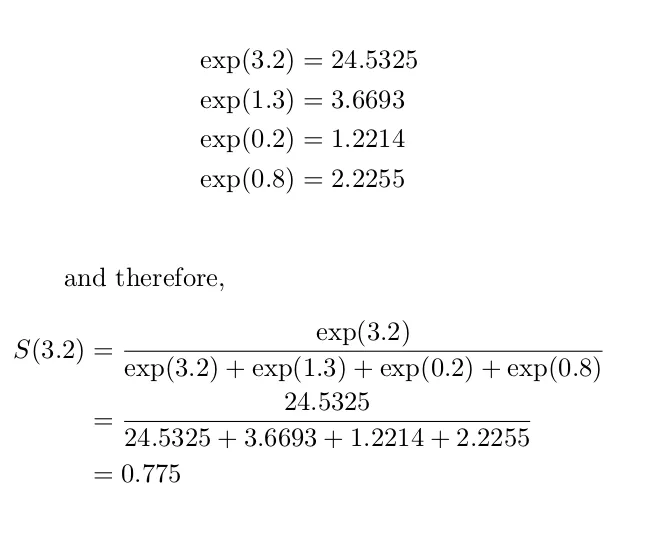

In [29]:
def softmax(logits_vector):
    exp = []
    probabilities = []
    for i in logits_vector:
        exp.append(np.exp(i))
    sum_of_exp = sum(exp)
    for i in exp:
        probability = i/sum_of_exp
        probabilities.append(round(probability,3))
    return probabilities

In [30]:
logits = [3.2,1.3,0.2,0.8]

In [31]:
softmax(logits)

[0.775, 0.116, 0.039, 0.07]

Notation: We can represent all the logits as a vector, v, and apply the activation function, S, on this vector to output the probabilities vector, p, and represent the operation as follows

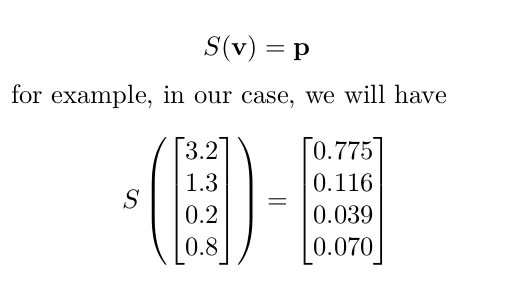

## 5) Categorical Cross-Entropy Loss Function

#### Also called Softmax Loss. It is a Softmax activation plus a Cross-Entropy loss.

### Non-Binary classification 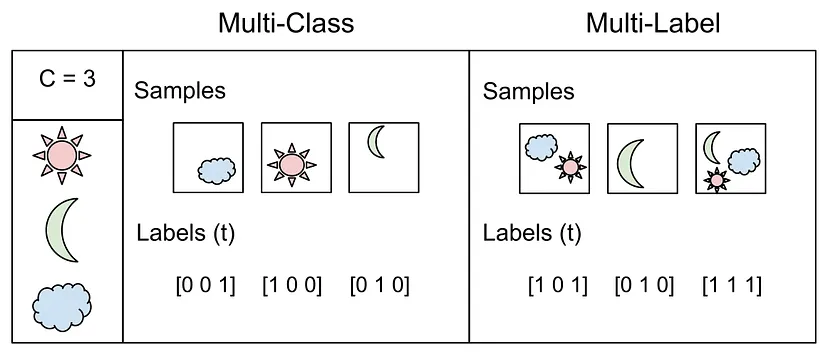

Multi-Class only classify one object from multiples objects in one sample.<br>
Multi-Label can classify multiples objects in one sample.

#### Multi-Class Single Label:
In this case, we can calculate using two different methods: Categorical Cross-Entropy and Sparse Categorical Cross-Entropy. We can explain themas following:

## categorical_crossentropy (cce):
produces a one-hot array containing the probable match for each category,<br>
## sparse_categorical_crossentropy (scce):
produces a category index of the most likely matching category.<br>

<b><u>Consider a classification problem with 5 categories (or classes).</u></b><br>
In the case of cce, the one-hot target may be [0, 1, 0, 0, 0] and the model may predict [.2, .5, .1, .1, .1] (probably right)<br>
In the case of scce, the target index may be [1] and the model may predict: [.5].<br>

<b><u>Consider now a classification problem with 3 classes.</u></b><br>
In the case of cce, the one-hot target might be [0, 0, 1] and the model may predict [.5, .1, .4] (probably inaccurate, given that it gives more probability to the first class)<br>
In the case of scce, the target index might be [0], and the model may predict [.5]<br>
Many categorical models produce scce output because you save space, but lose A LOT of information (for example, in the 2nd example, index 2 was also very close.)

<b><u>There are a number of situations to use scce, including:</u></b><br>
when your classes are mutually exclusive, i.e. you don’t care at all about other close-enough predictions,<br>
the number of categories is large to the prediction output becomes overwhelming.

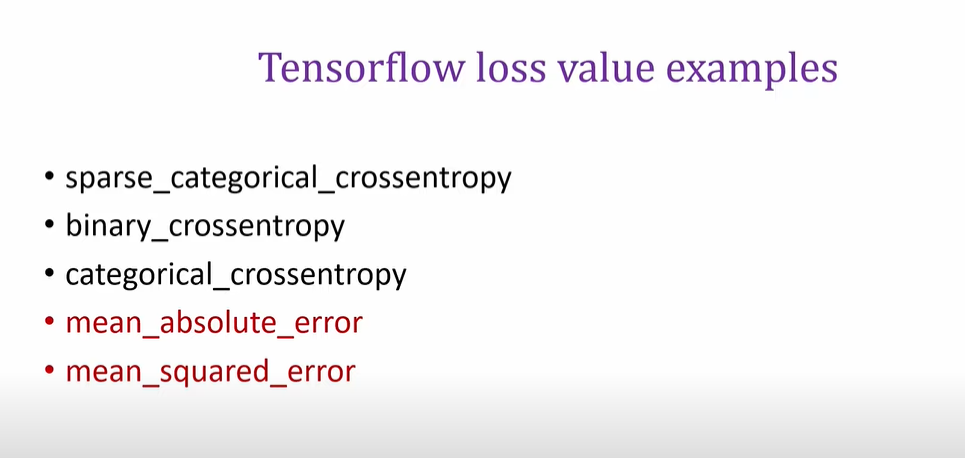